# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [69]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True
import re
import datetime as dt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
# чтение данных 
data = pd.read_csv(
    "data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceNo': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
# приведение столбца InvoiceDate в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
print('Временной интервал {} по {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))


Временной интервал 2010-12-01 по 2011-12-09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# описание данных
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


In [6]:
print("Распределение транзакций по годам/месяцам:")
print(data['InvoiceDate'].dt.to_period('M').value_counts().sort_index())

Распределение транзакций по годам/месяцам:
InvoiceDate
2010-12    42481
2011-01    35147
2011-02    27707
2011-03    36748
2011-04    29916
2011-05    37030
2011-06    36874
2011-07    39518
2011-08    35284
2011-09    50226
2011-10    60742
2011-11    84711
2011-12    25525
Freq: M, Name: count, dtype: int64


In [7]:
# Подсчет всех пропусков
total_missing = data.isnull().sum().sum()

# Подсчет пропусков по столбцам
missing_by_column = data.isnull().sum()

print("\nКоличество всех пропусков в данных:")
print(total_missing)
print("\nКоличество пропусков по столбцам:")
print(missing_by_column)


Количество всех пропусков в данных:
136534

Количество пропусков по столбцам:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# поиск дубликатов
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f'Количество дубликатов в данных: {(num_duplicates)}')

Количество дубликатов в данных: 5268


In [9]:
print(f"Уникальных клиентов (без пропусков): {data['CustomerID'].nunique()}")

Уникальных клиентов (без пропусков): 4372


In [10]:
# Страны, из которых совершались транзакции
unique_country = data['Country'].unique()
print(f'Страны, из которых совершались транзакции:{(unique_country)}')

Страны, из которых совершались транзакции:['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


**Итоги 1-ой части задания:**

#### **1. Исходные данные**
- **Объём данных**: 541 909 транзакций за период с **01.12.2010 по 09.12.2011**.
- **Структура данных**: 8 столбцов, включая информацию о заказах (`InvoiceNo`), товарах (`StockCode`, `Description`), клиентах (`CustomerID`), стране (`Country`), количестве (`Quantity`), цене (`UnitPrice`) и дате (`InvoiceDate`).

#### **2. Ключевые выводы**
- **География продаж**: Транзакции поступали из **38 стран**, основная часть — из **Великобритании** (это домашний рынок компании).
- **Клиентская база**:  
  - **4 373 уникальных клиента**, но **135 080 пропусков** в `CustomerID` (≈25% данных).   
- **Проблемы данных**:  
  - **Дубликаты**: 5 268 строк.  
  - **Аномалии**: Отрицательные значения в `Quantity` (возвраты) и `UnitPrice` (ошибки).  
  - **Неполные данные**: Некоторые отменённые заказы (`InvoiceNo` с 'C') не имеют исходных транзакций в датасете.  

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [11]:
# Удаляем строки с пропусками в CustomerID
df = data.dropna(subset=['CustomerID','Description'])

# Проверяем результат
print(f"Исходное количество строк: {len(data)}")
print(f"Количество строк после удаления пропусков: {len(df)}")
print(f"Количество удаленных строк: {len(data) - len(df)}")

Исходное количество строк: 541909
Количество строк после удаления пропусков: 406829
Количество удаленных строк: 135080


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [12]:
df_cleaned = df.drop_duplicates()

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [13]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

df_cleaned['QuantityCanceled'] = get_quantity_canceled(df_cleaned)

In [15]:
df_cleaned.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,0.0
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,2.0
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,United Kingdom,0.0
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,United Kingdom,1.0


*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



**Анализ возвратов без контрагентов**

In [16]:
num_missing_contragents = df_cleaned[(df_cleaned['QuantityCanceled'].isna())]
percentage = len(num_missing_contragents) / len(df_cleaned) * 100

print(f"Общее количество транзакций: {len(df_cleaned):,}")
print(f"Возвратов без контрагента: {len(num_missing_contragents):,}")
print(f"Процент возвратов без контрагента: {percentage:.2f}%")

Общее количество транзакций: 401,604
Возвратов без контрагента: 1,303
Процент возвратов без контрагента: 0.32%


0.32% транзакций в данных не имеют контрагентов - это небольшой процент, поэтому эти данные можно удалить 

In [17]:
df_cleaned = df_cleaned.dropna(subset=['QuantityCanceled'])

**Удаление транзакций с отрицательным Quantity**

In [18]:
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [19]:
# уникальные специальные транзакции из столбца 'StockCode'
special_transactions = df_cleaned[df_cleaned['StockCode'].str.contains(r'^[A-Za-z]', regex=True, na=False)]
unique_special_stock_codes = special_transactions['StockCode'].unique()
print("Уникальные специальные транзакции (StockCode):")
print(unique_special_stock_codes)

Уникальные специальные транзакции (StockCode):
['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']


In [20]:
special_transactions = df_cleaned[df_cleaned['StockCode'].str.contains(r'^[A-Za-z]', regex=True, na=False)]
print(f"Найдено специальных транзакций: {len(special_transactions)}")
print("Примеры специальных кодов:")
print(special_transactions[['StockCode', 'Description']].drop_duplicates().head(10))
#Удаление специализированных транзакций
df_cleaned = df_cleaned[~df_cleaned['StockCode'].str.contains(r'^[A-Za-z]', regex=True, na=False)]


Найдено специальных транзакций: 1549
Примеры специальных кодов:
           StockCode                 Description
45              POST                     POSTAGE
1423              C2                    CARRIAGE
2239               M                      Manual
4406    BANK CHARGES                Bank Charges
157195          PADS  PADS TO MATCH ALL CUSHIONS
317507           DOT              DOTCOM POSTAGE


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [21]:
# Удаление бесплатных товаров

free_items = df_cleaned[df_cleaned['UnitPrice'] == 0] #бесплатные товары 
zero_price_count = len(free_items) # количество бесплатных товаров 
total_count = len(df_cleaned) # общее количество товаров 
percentage = (zero_price_count / total_count) * 100


print(f"Всего транзакций: {total_count:,}")
print(f"Количество бесплатных товаров: {len(free_items)}")
print(f"Процент от общего числа: {percentage:.2f}%")

Всего транзакций: 391,183
Количество бесплатных товаров: 33
Процент от общего числа: 0.01%


Бесплатных транзакций 0.01%, можно удалить их. 

In [22]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [23]:
# Добавление общей стоимости
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [24]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


In [25]:
# Сохранение результатов
df_cleaned.to_csv('clean_data.csv', index=False)
print("\nДанные сохранены в 'clean_data.csv'")


Данные сохранены в 'clean_data.csv'


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [46]:
df = pd.read_csv('clean_data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


In [47]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         391150 non-null  int64  
 1   StockCode         391150 non-null  object 
 2   Description       391150 non-null  object 
 3   Quantity          391150 non-null  int64  
 4   InvoiceDate       391150 non-null  object 
 5   UnitPrice         391150 non-null  float64
 6   CustomerID        391150 non-null  int64  
 7   Country           391150 non-null  object 
 8   QuantityCanceled  391150 non-null  float64
 9   TotalPrice        391150 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 29.8+ MB


In [42]:
# 5 самых частых товаров из Description
top_5_products = df['Description'].value_counts().head(5)
print("5 самых частых товаров:")
print(top_5_products)

5 самых частых товаров:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
Name: count, dtype: int64


В данных присутствуют такие страны как Unspecified и European Community - они не информативны. Их можно удалить. 

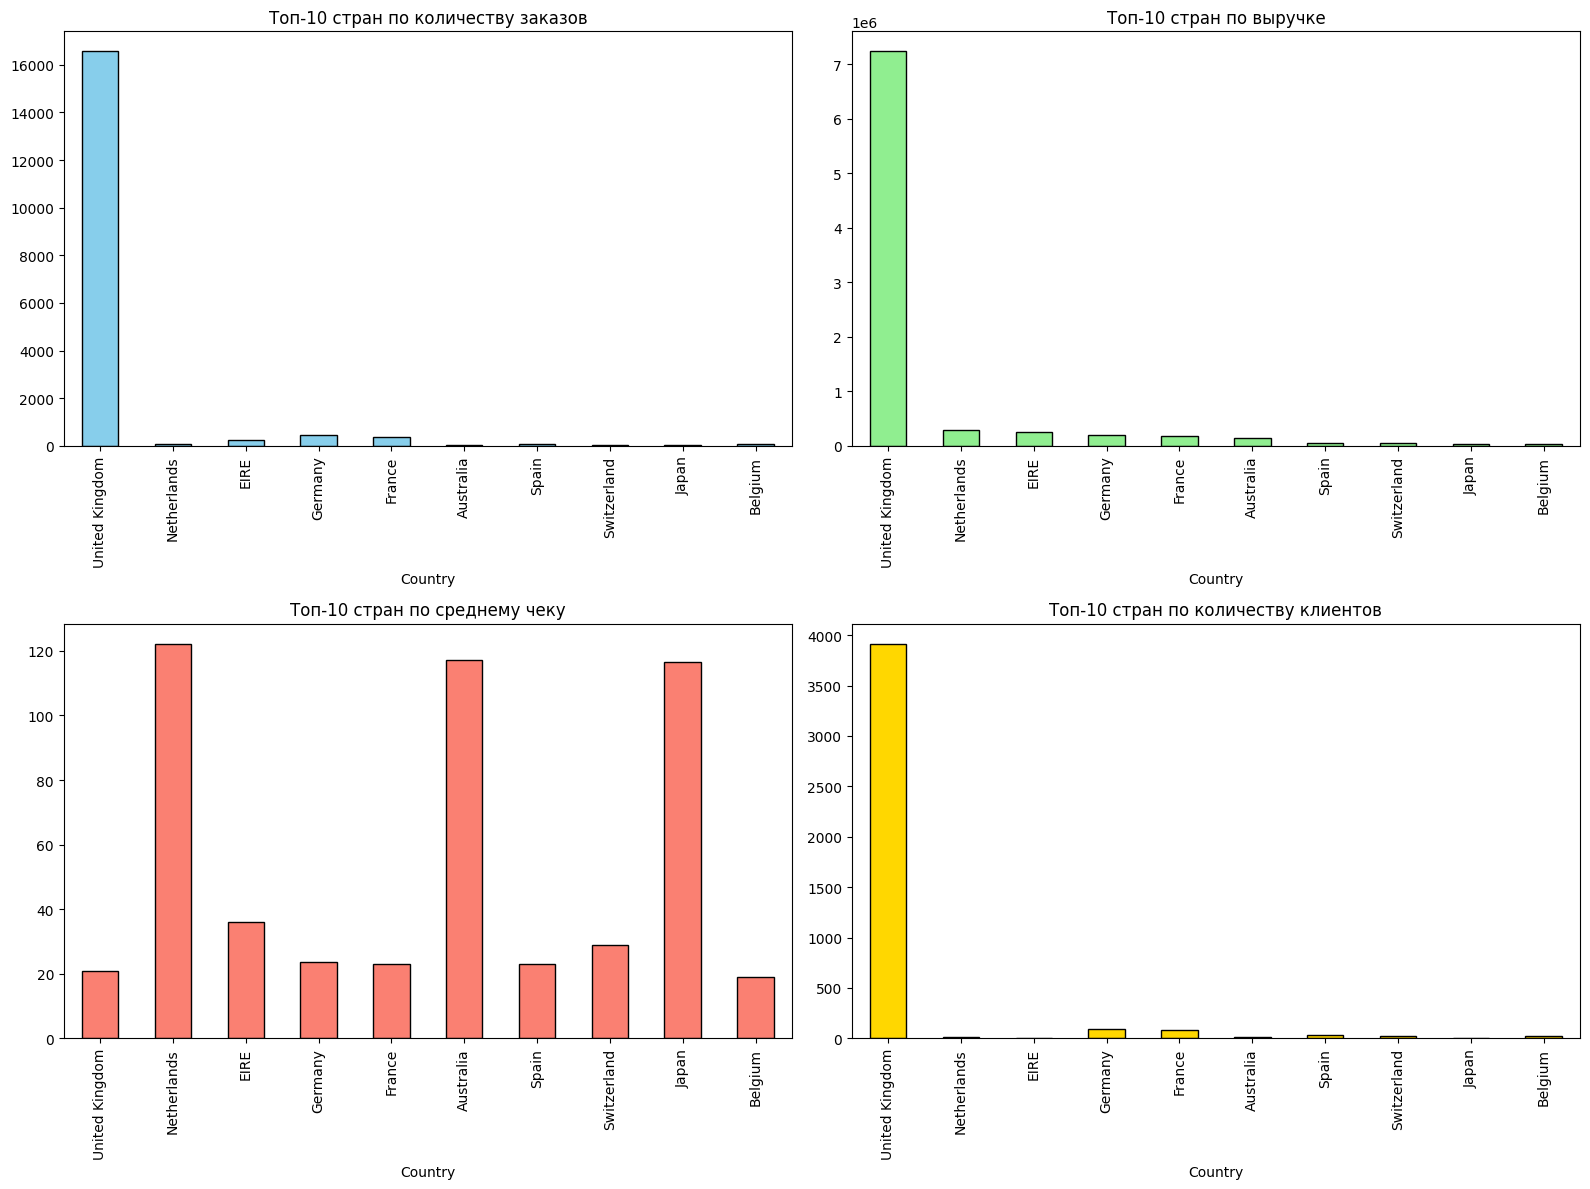

In [ ]:
# 1. Анализ по странам 
def analyze_countries(df):
    # Удаляем ненужные страны
    df = df[~df['Country'].isin(['Unspecified', 'European Community'])]
    
    # Создаем сводную таблицу
    country_stats = (
        df.groupby('Country')
        .agg(
            Транзакции=('InvoiceNo', 'nunique'),  
            Суммарная_стоимость=('TotalPrice', 'sum'),
            Средний_чек=('TotalPrice', 'mean'),
            Клиенты=('CustomerID', 'nunique')
        )
        .sort_values('Суммарная_стоимость', ascending=False)
        .round(2)
    )
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # График 1: Топ-10 стран по транзакциям
    country_stats['Транзакции'].head(10).plot(
        kind='bar', ax=axes[0,0], title='Топ-10 стран по количеству заказов', color='skyblue')
    
    # График 2: Топ-10 стран по выручке
    country_stats['Суммарная_стоимость'].head(10).plot(
        kind='bar', ax=axes[0,1], title='Топ-10 стран по выручке', color='lightgreen')
    
    # График 3: Топ-10 стран по среднему чеку
    country_stats['Средний_чек'].head(10).plot(
        kind='bar', ax=axes[1,0], title='Топ-10 стран по среднему чеку', color='salmon')
    
    # График 4: Топ-10 стран по количеству клиентов
    country_stats['Клиенты'].head(10).plot(
        kind='bar', ax=axes[1,1], title='Топ-10 стран по количеству клиентов', color='gold')
    
    plt.tight_layout()
    plt.show()
    
    return country_stats

country_stats = analyze_countries(df)

### **Топ-10 стран по количеству заказов**
**График подтверждает:**
- Великобритания — абсолютный лидер (более 16K заказов).
- Остальные страны (Нидерланды, Германия, Франция и др.) имеют менее 500 заказов каждая.

### **Топ-10 стран по среднему чеку**
**Наблюдения:**
- Великобритания снова лидирует (**2,640.49**).
- Нидерланды (**674.32**) и Ирландия (**461.42**) на 2-м и 3-м местах.
- Разрыв между Великобританией и остальными странами колоссальный.

### **Суммарная стоимость транзакций по странам**
**График показывает:**
- Великобритания даёт **~90% выручки**.
- Остальные страны почти не видны на фоне её показателей.

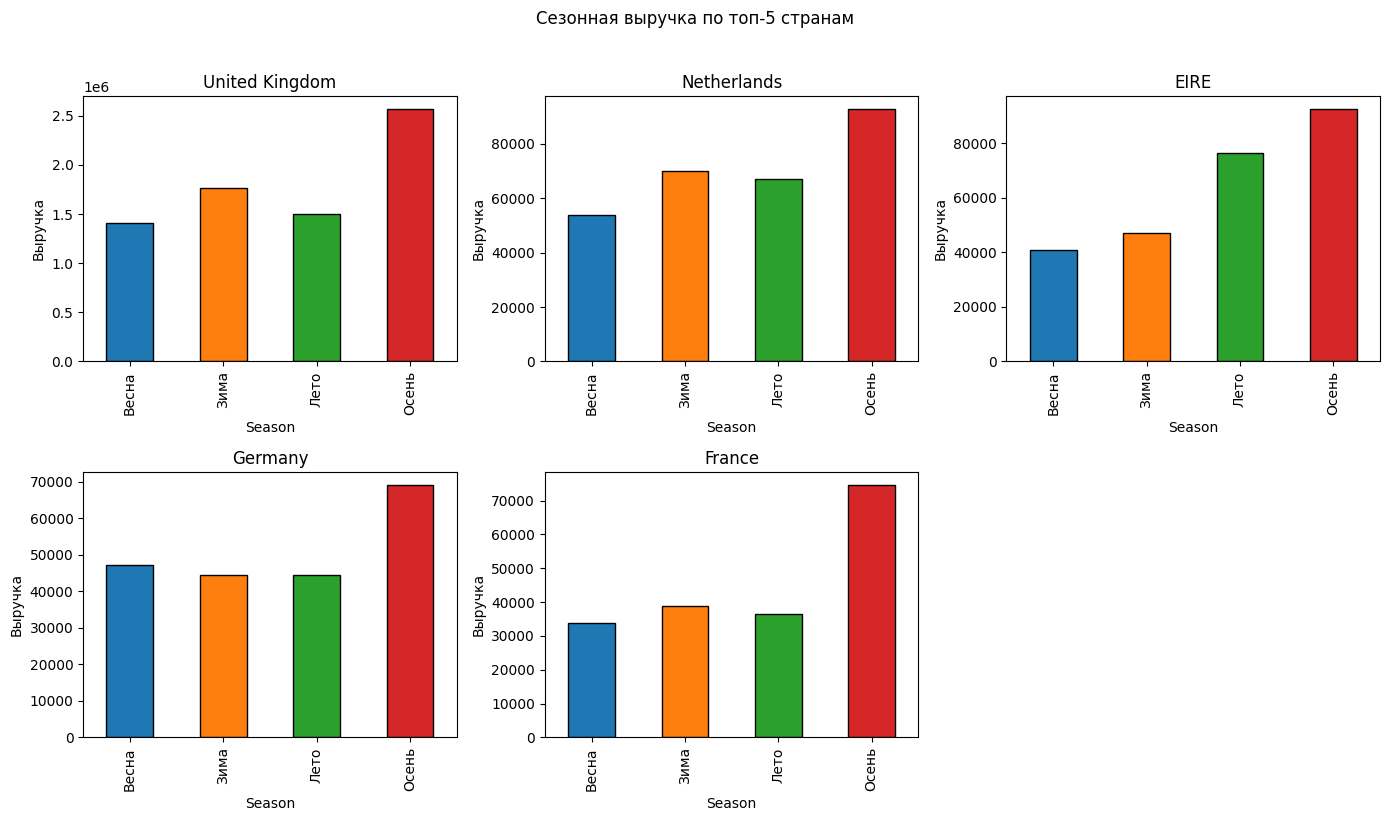

In [ ]:
# 2. Сезонный анализ (улучшенная версия)
def seasonal_analysis(df):
  
    df['Season'] = pd.to_datetime(df['InvoiceDate']).dt.month.map({
        12: 'Зима', 1: 'Зима', 2: 'Зима',
        3: 'Весна', 4: 'Весна', 5: 'Весна',
        6: 'Лето', 7: 'Лето', 8: 'Лето',
        9: 'Осень', 10: 'Осень', 11: 'Осень'
    })
    
    df['Quarter'] = pd.to_datetime(df['InvoiceDate']).dt.quarter
    
    # Анализ по сезонам
    seasonal = df.groupby(['Country', 'Season'])['TotalPrice'].sum().unstack()
    
    # Визуализация для топ-5 стран
    top_countries = country_stats.index[:5]
    
    plt.figure(figsize=(14, 8))
    for i, country in enumerate(top_countries, 1):
        plt.subplot(2, 3, i)
        seasonal.loc[country].plot(
            kind='bar', 
            title=f'{country}',
            color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        )
        plt.ylabel('Выручка')
    
    plt.suptitle('Сезонная выручка по топ-5 странам', y=1.02)
    plt.tight_layout()
    plt.show()
    
    return seasonal

seasonal = seasonal_analysis(df)


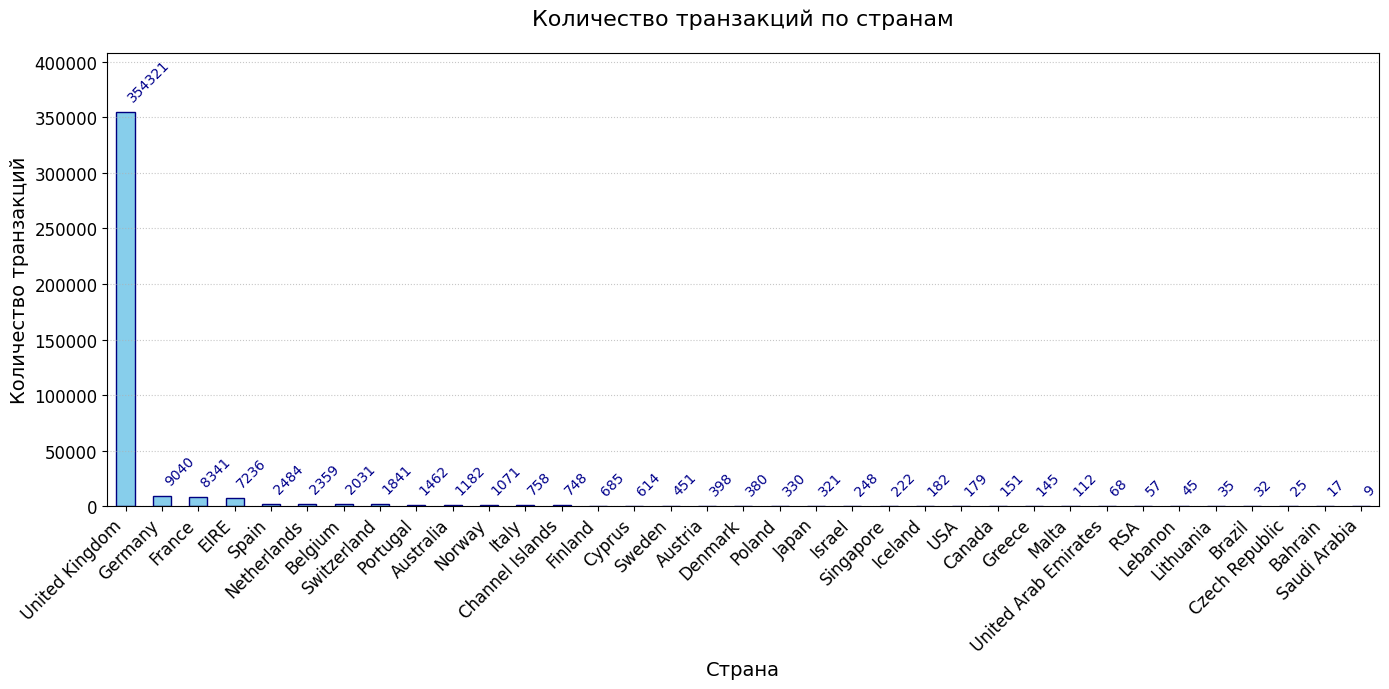

In [ ]:
# Клиенты из каких стран покупают больше и чаще?
# Группируем данные по странам
country_counts = df['Country'].value_counts()

# 2. Строим диаграмму
plt.figure(figsize=(14, 7))
ax = country_counts.plot(kind='bar', color='skyblue', edgecolor='navy')

plt.title('Количество транзакций по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество транзакций', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.7)

# 3. Добавляем подписи значений по диагонали
for i, v in enumerate(country_counts):
    ax.text(i, v + max(country_counts)*0.02,  # Отступ 2% от максимального значения
             str(v), 
             rotation=45,  
             ha='left',   
             va='bottom',  
             fontsize=10,
             color='darkblue')

# Увеличиваем верхнюю границу для подписей
plt.ylim(0, max(country_counts) * 1.15)

plt.tight_layout()
plt.show()

Так как компания базируется в Великобритании, большинство заказов приходится на эту страну. Далее можно увидеть, что в основном данным сервисом пользуются покупатели из стран Европы, а в конце идут страны Востока - скорее всего это связано с трудностью в логистике. 

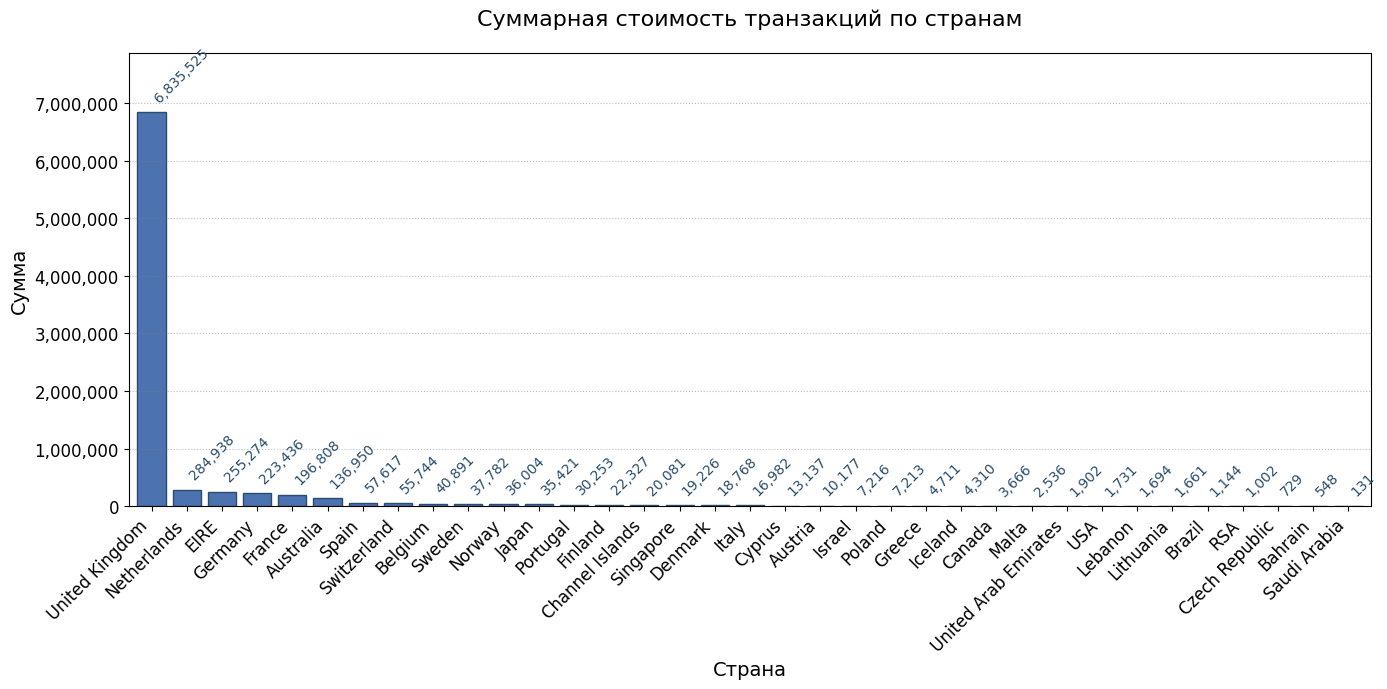

In [82]:
# 1. Группируем данные по странам и суммируем TotalPrice
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# 2. Создаем фигуру
plt.figure(figsize=(14, 7))
ax = country_revenue.plot(kind='bar', color='#4c72b0', edgecolor='#2a4d6d', width=0.8)

# 3. Настройки графика
plt.title('Суммарная стоимость транзакций по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Сумма', fontsize=14)  # Без указания валюты
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.5, color='gray')

# 4. Добавляем подписи значений (без символа £)
for i, v in enumerate(country_revenue):
    ax.text(i, v + max(country_revenue)*0.02, 
            f'{v:,.0f}',  # Форматирование числа без валюты
            rotation=45,
            ha='left',
            va='bottom',
            fontsize=10,
            color='#2a4d6d')

# 5. Форматируем ось Y (только числа с разделителями тысяч)
ax.yaxis.set_major_formatter('{x:,.0f}')

# 6. Увеличиваем верхнюю границу
plt.ylim(0, max(country_revenue) * 1.15)

plt.tight_layout()
plt.show()

In [45]:
# Создаем сводную таблицу
country_stats = (
    df.groupby('Country')
    .agg(
        Транзакции=('InvoiceNo', 'nunique'),
        Суммарная_стоимость=('TotalPrice', 'sum'),
        Средний_чек=('TotalPrice', lambda x: x.sum() / x.nunique())
    )
    .sort_values('Суммарная_стоимость', ascending=False)
    .round(2)
)

# Форматирование таблицы БЕЗ символа валюты
styled_table = (
    country_stats.style
    .format({
        'Суммарная_стоимость': '{:,.2f}',
        'Средний_чек': '{:,.2f}'
    })
    .background_gradient(cmap='Blues', subset=['Средний_чек'])
    .set_caption('Статистика по странам (числовые значения)')
)

# Вывод таблицы
display(styled_table)

,Транзакции,Суммарная_стоимость,Средний_чек
Country,,,
United Kingdom,16579,"7,242,855.32","2,640.49"
Netherlands,93,"283,889.34",674.32
EIRE,256,"257,013.12",461.42
Germany,443,"205,381.15",421.73
France,379,"183,801.94",397.84
Australia,56,"138,103.81",400.30
Spain,88,"55,706.56",176.85
Switzerland,47,"52,441.95",208.10
Japan,19,"37,416.37",269.18


### **Статистика по странам (числовые значения)**
**Основные выводы:**
- **Великобритания** доминирует по всем показателям:
  - 16,579 транзакций (94% от общего числа)
  - Суммарная выручка: **7,242,855.32** (в 25 раз больше, чем у Нидерландов, занявших 2-е место)
  - Средний чек: **2,640.49** (максимальный среди всех стран)
- **Нидерланды** и **Ирландия (EIRE)** — следующие по объёму продаж, но их вклад незначителен по сравнению с Великобританией.
- **Средний чек** варьируется от **29.18** (Саудовская Аравия) до **2,640.49** (Великобритания), что указывает на сильный дисбаланс в покупательной способности.

Надо исследовать причины низкого среднего чека в других странах (возможно, проблемы с доставкой или ассортиментом).

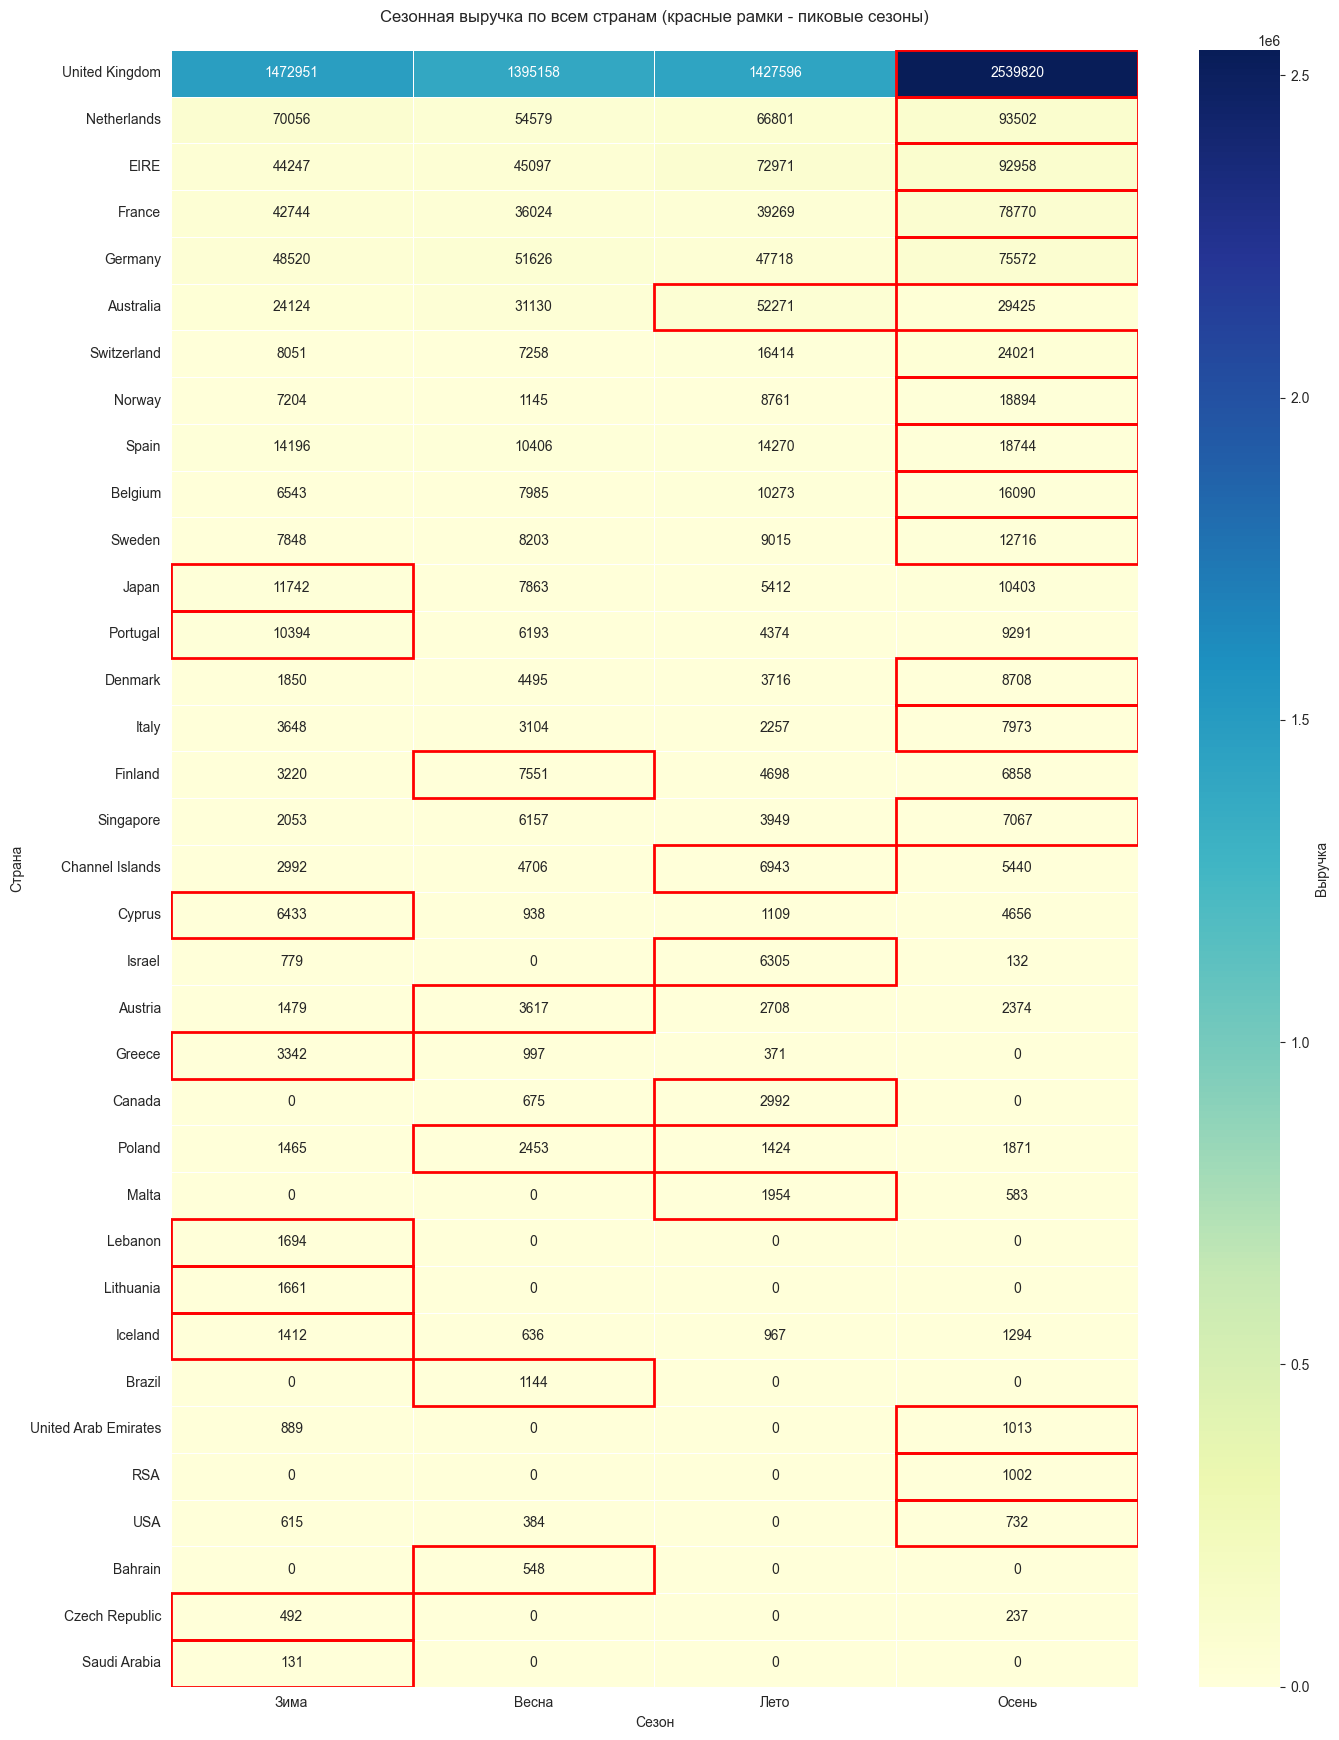

In [ ]:
#Какие страны приносят наибольшую сезонную выручку?
# Группировка данных по сезонам
seasonal_revenue = (
    df.assign(
        Season=pd.to_datetime(df['InvoiceDate']).dt.month.map({
            12: 'Зима', 1: 'Зима', 2: 'Зима',
            3: 'Весна', 4: 'Весна', 5: 'Весна',
            6: 'Лето', 7: 'Лето', 8: 'Лето',
            9: 'Осень', 10: 'Осень', 11: 'Осень'
        })
    )
    .groupby(['Country', 'Season'])
    ['TotalPrice'].sum()
    .unstack()
    .fillna(0)
)

# Находим пиковый сезон для каждой страны
seasonal_revenue['Пиковый_сезон'] = seasonal_revenue[['Зима', 'Весна', 'Лето', 'Осень']].idxmax(axis=1)
seasonal_revenue['Макс_выручка'] = seasonal_revenue[['Зима', 'Весна', 'Лето', 'Осень']].max(axis=1)

# Сортируем по общей выручке
seasonal_revenue = seasonal_revenue.sort_values('Макс_выручка', ascending=False)

# Визуализация
plt.figure(figsize=(14, len(seasonal_revenue)*0.5))  # Динамический размер по количеству стран

# Тепловая карта с аннотацией пикового сезона
ax = sns.heatmap(
    seasonal_revenue[['Зима', 'Весна', 'Лето', 'Осень']],
    cmap='YlGnBu',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Выручка'}
)

# Добавляем маркеры для пикового сезона
for i, (index, row) in enumerate(seasonal_revenue.iterrows()):
    peak_season = row['Пиковый_сезон']
    j = ['Зима', 'Весна', 'Лето', 'Осень'].index(peak_season)
    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title('Сезонная выручка по всем странам (красные рамки - пиковые сезоны)', pad=20)
plt.xlabel('Сезон')
plt.ylabel('Страна')
plt.tight_layout()
plt.show()


**1. Общие тренды по сезонам**

**Осень** - абсолютный лидер по выручке для большинства стран (особенно для UK, Нидерландов, Ирландии)

**Зима** - второй по значимости сезон (пик рождественских продаж)

**Лето и Весна** показывают более низкие результаты в большинстве случаев

**2. Топ-5 стран по пиковой выручке**

United Kingdom - 2,539,820 (Осень - вероятно, из-за предновогодних покупок.)

Netherlands - 93,502 (Осень)

EIRE - 92,958 (Осень)

France - 78,770 (Осень)

Germany - 75,572 (Осень)

**3. Интересные аномалии**

**Австралия**. Пик летом (52,271) - соответствует их зимнему сезону. Нетипичный паттерн для северного полушария



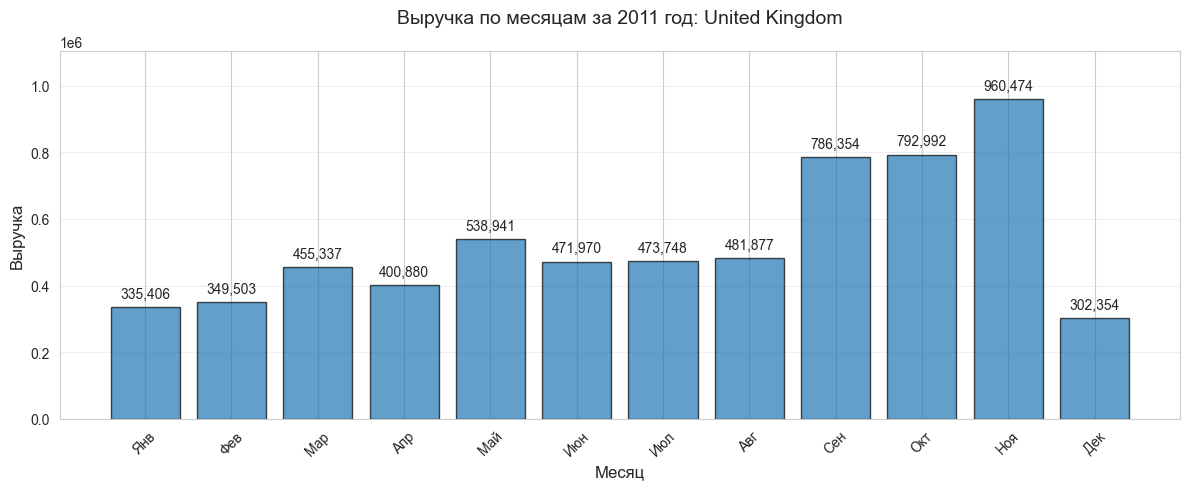

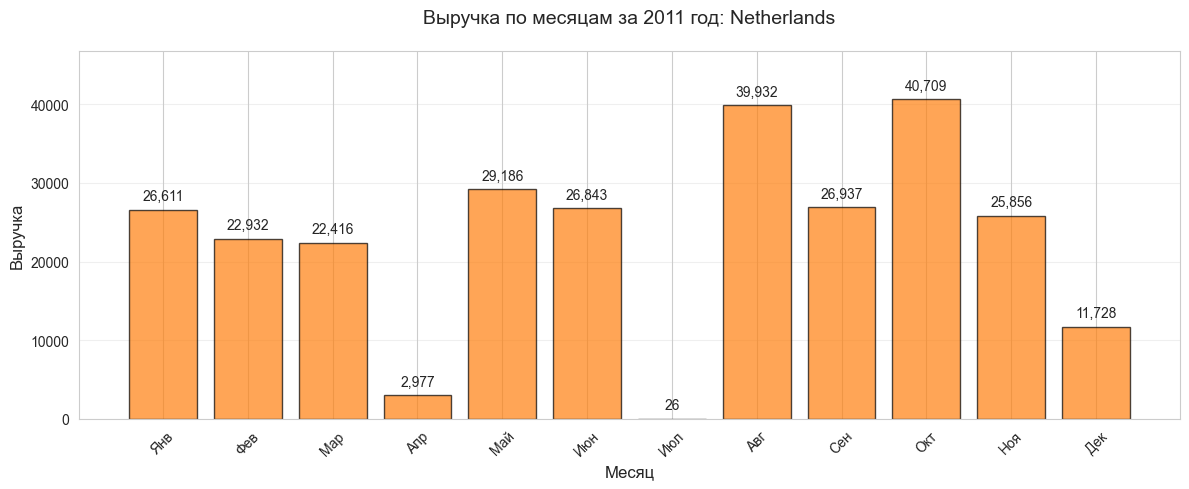

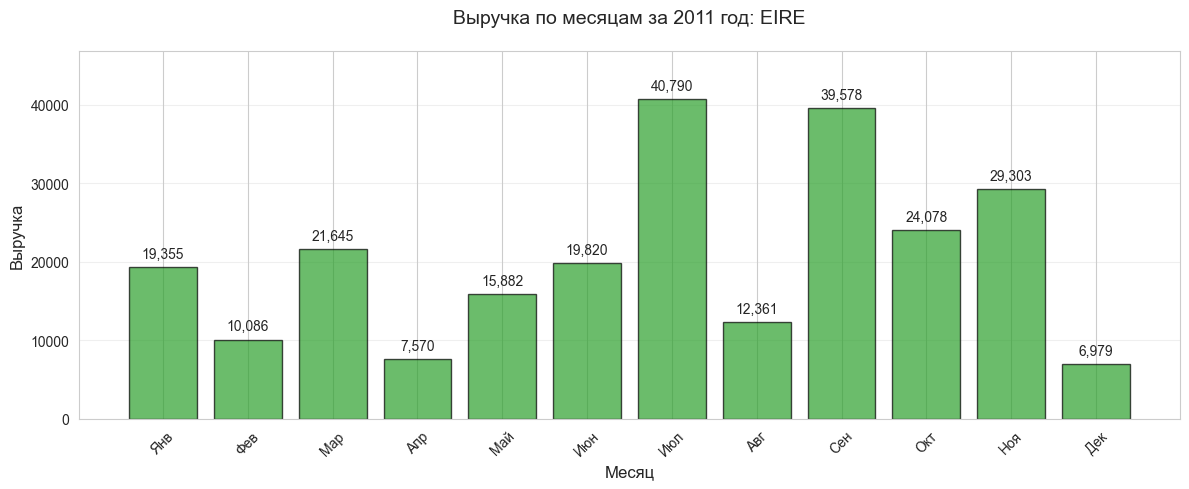

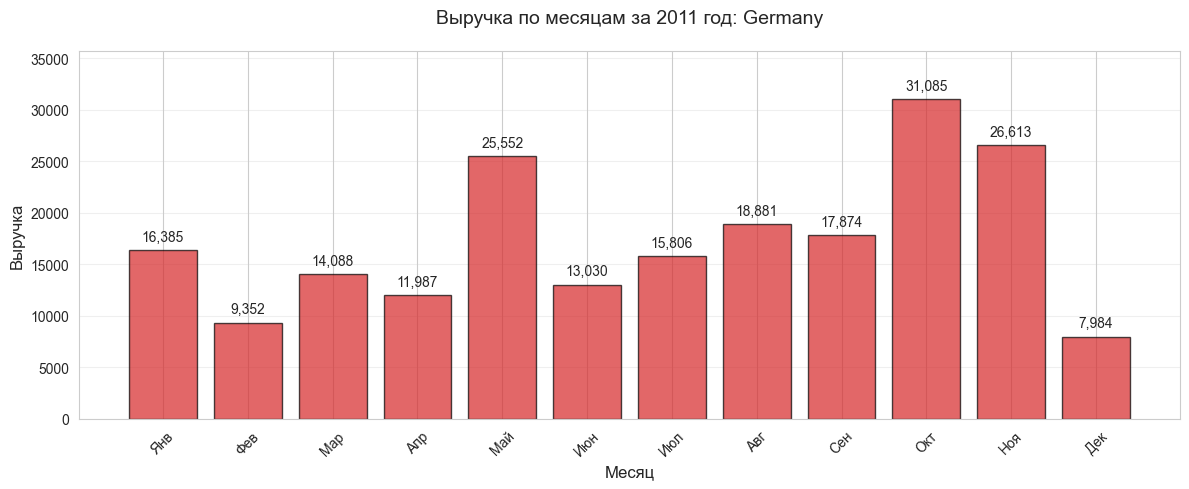

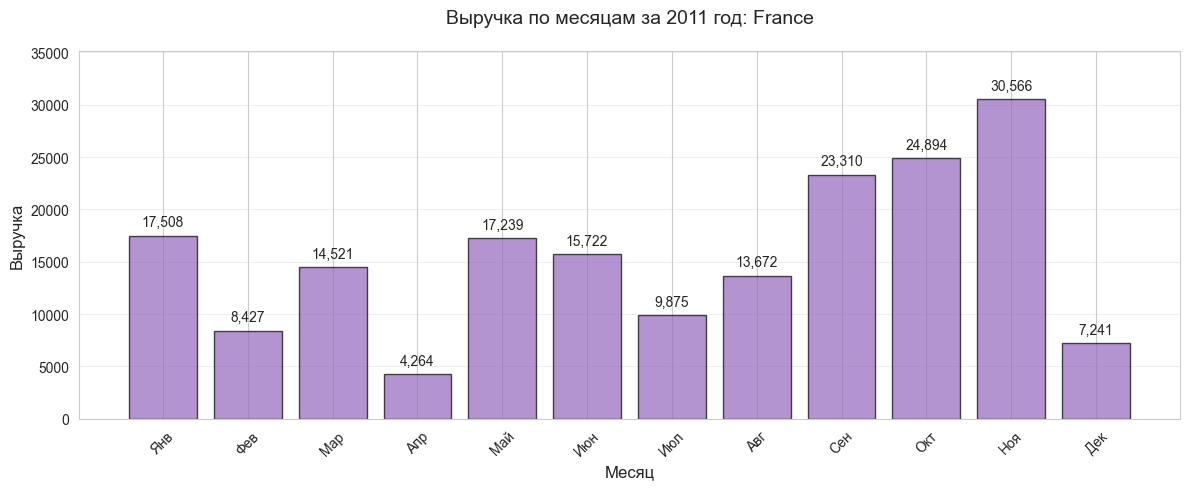

In [ ]:
# Копируем данные
df_s = df.copy()

# Подготовка данных
df_s['InvoiceDate'] = pd.to_datetime(df_s['InvoiceDate'])
df_s['Month'] = df_s['InvoiceDate'].dt.month
df_s['Year'] = df_s['InvoiceDate'].dt.year

# Фильтруем только 2011 год
df_2011 = df_s[df_s['Year'] == 2011]

# Топ-5 стран по общей выручке за 2011 год
top_countries = df_2011.groupby('Country')['TotalPrice'].sum().nlargest(5).index.tolist()

# Настройка стиля
sns.set_style("whitegrid")  # Используем стиль seaborn
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Построение графиков для каждой страны
for i, country in enumerate(top_countries):
    # Фильтрация данных по стране
    country_data = df_2011[df_2011['Country'] == country]
    
    # Агрегация по месяцам
    monthly_revenue = country_data.groupby('Month')['TotalPrice'].sum()
    
    # Создание графика
    plt.figure(figsize=(12, 5))
    
    # Столбчатая диаграмма
    bars = plt.bar(
        monthly_revenue.index,
        monthly_revenue.values,
        color=colors[i],
        alpha=0.7,
        edgecolor='black'
    )
    
    # Добавление значений на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + max(monthly_revenue)*0.02,
            f'{height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    # Оформление
    plt.title(f'Выручка по месяцам за 2011 год: {country}', fontsize=14, pad=20)
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.xticks(
        range(1, 13),
        ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'],
        rotation=45
    )
    plt.ylim(0, max(monthly_revenue)*1.15)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
  

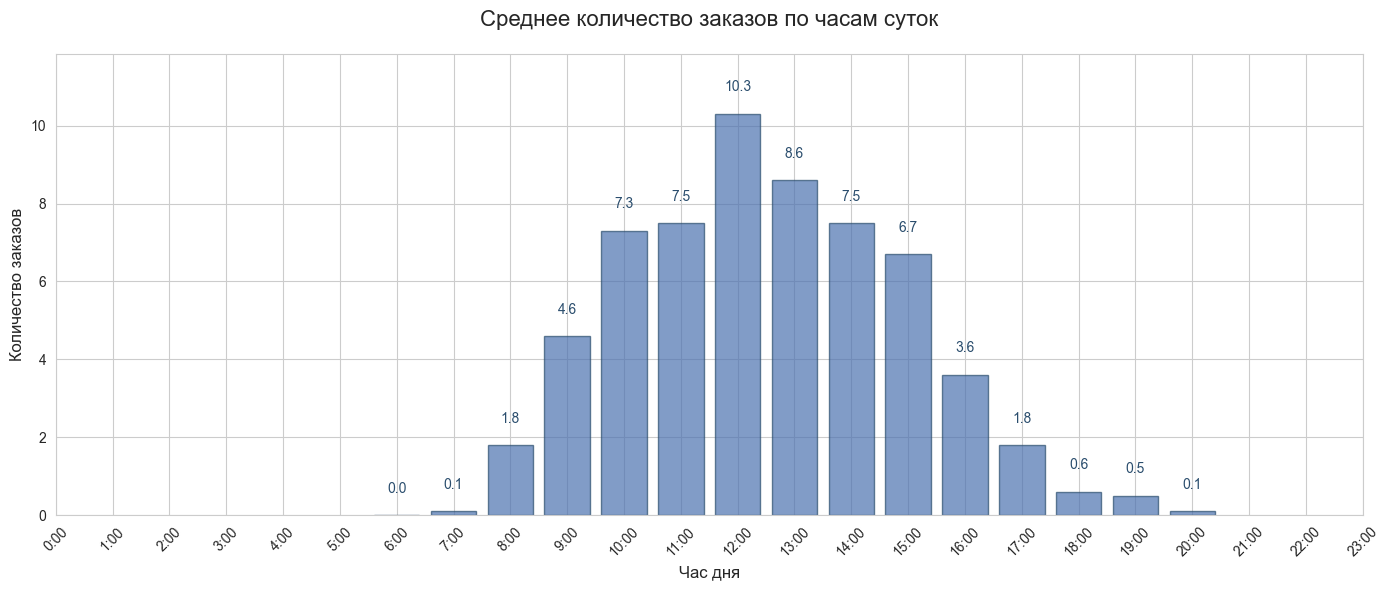

In [ ]:
df_analysis = df.copy()

# 1. Преобразуем дату и извлекаем компоненты
df_analysis['InvoiceDate'] = pd.to_datetime(df_analysis['InvoiceDate'])
df_analysis['Date'] = df_analysis['InvoiceDate'].dt.date  # Дата без времени
df_analysis['Hour'] = df_analysis['InvoiceDate'].dt.hour  # Час совершения заказа

# 2. Считаем уникальные заказы по дням и часам
orders_by_hour = (
    df_analysis.groupby(['Date', 'Hour'])
    ['InvoiceNo'].nunique()  # Уникальные номера заказов
    .unstack()              # Преобразуем часы в столбцы
    .fillna(0)              # Заменяем пропуски нулями
)

# 3. Рассчитываем среднее количество заказов по часам
avg_orders_by_hour = orders_by_hour.mean().round(1)  # Округляем до 1 знака

# 4. Визуализация
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")  # Сетка для улучшенной читаемости

# Столбчатая диаграмма с настройками
bars = plt.bar(
    avg_orders_by_hour.index,
    avg_orders_by_hour.values,
    color='#4c72b0',       # Цвет столбцов
    alpha=0.7,             # Прозрачность
    edgecolor='#2a4d6d',    # Цвет границ
    linewidth=1            # Толщина границы
)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.5,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='#2a4d6d'
    )

# Настройки оформления
plt.title('Среднее количество заказов по часам суток', fontsize=16, pad=20)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(range(24), [f'{h}:00' for h in range(24)], rotation=45)
plt.ylim(0, avg_orders_by_hour.max() * 1.15)  # Запас 15% сверху

# Отображаем график
plt.tight_layout()
plt.show()


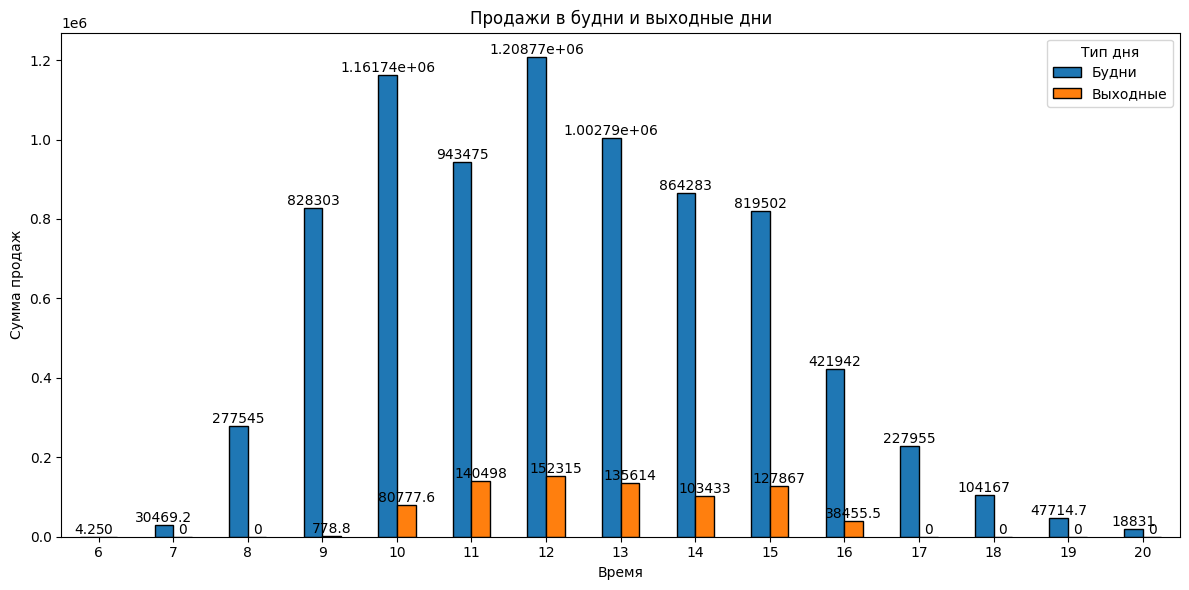

In [54]:
df_a = df.copy()
df_a ['InvoiceDate'] = pd.to_datetime(df_a ['InvoiceDate'])
# Преобразование времени выставления счета
df_a['Hour'] = df_a['InvoiceDate'].dt.hour
df_a['DayOfWeek'] = df_a['InvoiceDate'].dt.dayofweek

# Определение будней и выходных
df_a['IsWeekend'] = df_a['DayOfWeek'].apply(lambda x: 'Выходные' if x >= 5 else 'Будни')

# Группировка
sales_by_time = df_a.groupby(['Hour', 'IsWeekend'])['TotalPrice'].sum().unstack().fillna(0)

# Построение диаграммы
ax = sales_by_time.plot(kind='bar', figsize=(12, 6))
plt.title('Продажи в будни и выходные дни')
plt.xlabel('Время')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=0)
plt.legend(title='Тип дня')

# Добавление значений на столбцы
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, rotation=0)

plt.tight_layout()
plt.show()

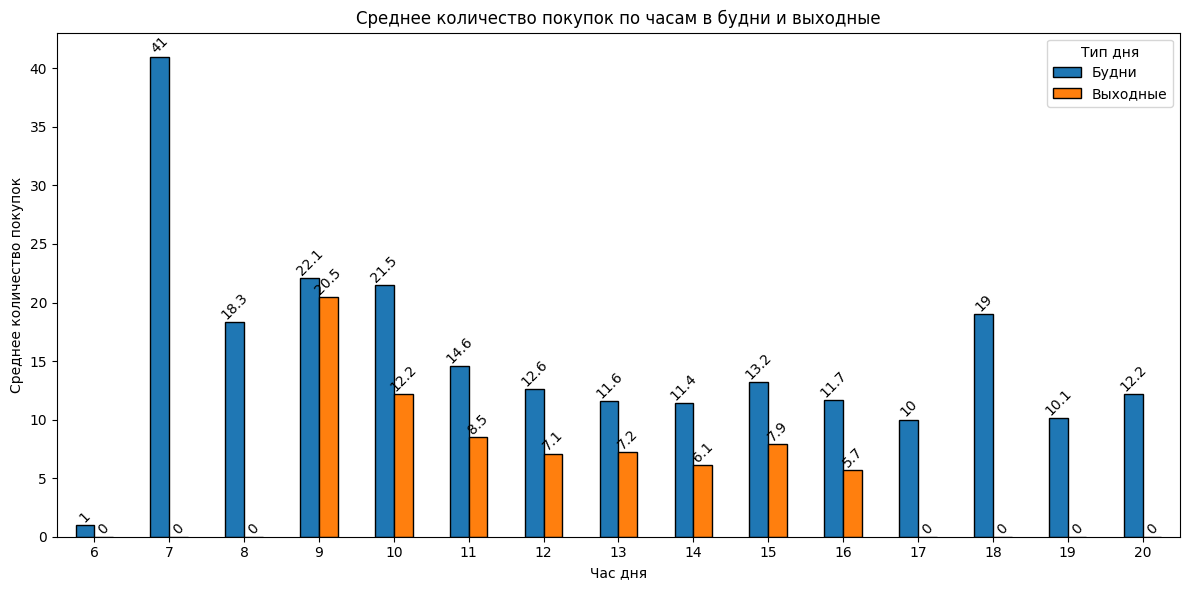

In [55]:
# Группировка и расчет среднего количества покупок

average_purchases = df_a.groupby(['Hour', 'IsWeekend'])['Quantity'].mean().round(1).unstack().fillna(0)

# Построение диаграммы
ax = average_purchases.plot(kind='bar', figsize=(12, 6))
plt.title('Среднее количество покупок по часам в будни и выходные')
plt.xlabel('Час дня')
plt.ylabel('Среднее количество покупок')
plt.xticks(rotation=0)
plt.legend(title='Тип дня')

# Добавление значений на столбцы
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, rotation=45)

plt.tight_layout()
plt.show()

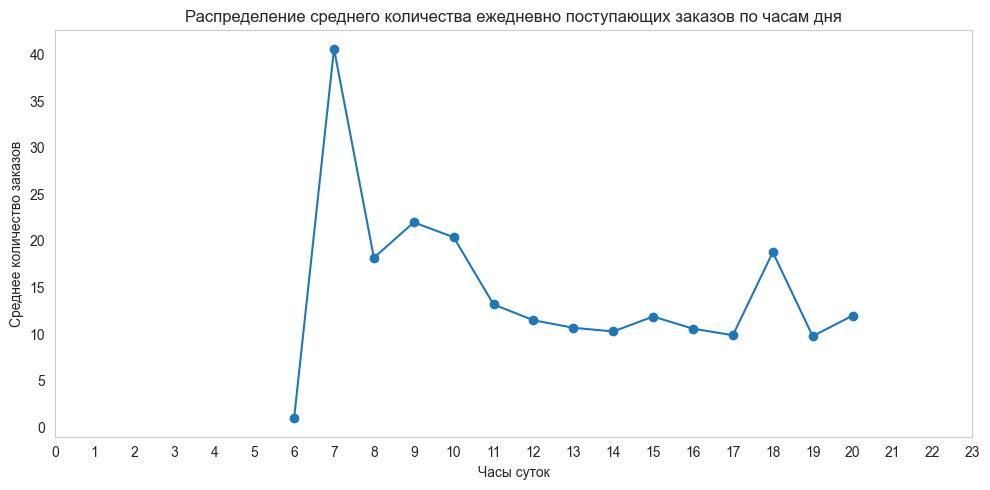

In [121]:
# Извлечение часа из времени выставления счета
df['Hour'] = df_a['InvoiceDate'].dt.hour

# Группировка по часам и расчет среднего количества заказов
average_orders = df_a.groupby('Hour')['Quantity'].mean().round(1)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(average_orders.index, average_orders.values, marker='o')
plt.title('Распределение среднего количества ежедневно поступающих заказов по часам дня')
plt.xlabel('Часы суток')
plt.ylabel('Среднее количество заказов')
plt.xticks(range(24))
plt.grid()
plt.tight_layout()
plt.show()

### **Продажи по дням недели (Weekday vs Weekend)**
**Выводы:**
- **Будни (Weekday):** 
  - Пик с 10:00 до 15:00 (рабочее время).
  - Максимум в 12:00 (~30 покупок/час).
- **Выходные (Weekend):** 
  - Активность ниже, но равномернее (10:00–18:00).
  - Пик в 11:00 (~15 покупок/час).

**Инсайт:**
- Реклама в будни утром и днём эффективнее.
- На выходных можно снижать затраты на маркетинг.

### **7. Распределение заказов по часам дня**
**Тренды:**
- **Часы работы магазина:** с 6:00 до 20:00.
- **Пиковые часы:** 12:00–13:00 (максимум заказов).
- **Минимум активности:** ночью (0:00–5:00) и после 20:00.

**Анализ графиков и данных о транзакциях**

На представленных графиках и таблицах видна четкая структура данных, которая позволяет сделать несколько важных выводов о покупательской активности и особенностях продаж.

График суммарной стоимости транзакций по странам демонстрирует абсолютное доминирование Великобритании в общем объеме продаж. Эта страна обеспечивает подавляющую часть выручки, что видно по масштабу столбца на диаграмме. Остальные страны, включая Нидерланды, Ирландию и Германию, имеют значительно меньшие показатели. Такой дисбаланс указывает на высокую зависимость бизнеса от одного рынка, что может представлять определенные риски. При этом важно отметить, что средний чек в Великобритании также существенно выше, чем в других странах, так как этот магазин там базируется.

Сезонный анализ выручки по странам, представленный в виде тепловой карты, показывает интересные закономерности. Для большинства стран, включая Великобританию, пик продаж приходится на осенний период. Это может быть связано с предновогодними покупками и сезоном праздников. Однако некоторые страны, такие как Австралия, демонстрируют неожиданные сезонные колебания - например, летний всплеск продаж, который требует дополнительного изучения. Возможно, это связано с местными климатическими особенностями или специфическими маркетинговыми кампаниями. Красные рамки на тепловой карте четко выделяют эти сезонные пики, позволяя легко идентифицировать наиболее прибыльные периоды для каждого рынка.

Графики, отображающие активность покупок в зависимости от времени суток и дней недели, предоставляют ценную информацию для оптимизации бизнес-процессов. Видно, что в будние дни пик активности приходится на обеденное время (12:00-15:00), тогда как в выходные дни покупательская активность более равномерно распределена между 10:00 и 18:00. Ночные часы и раннее утро показывают минимальную активность, что логично соответствует обычному режиму работы онлайн-магазинов и поведению покупателей. Эти данные могут быть полезны для планирования работы службы поддержки, проведения маркетинговых кампаний и управления ресурсами компании.

Анализ среднего чека по странам подтверждает лидирующее положение Великобритании, но также выявляет интересные особенности других рынков. Например, некоторые небольшие страны демонстрируют относительно высокие показатели среднего чека, что может указывать на потенциал для развития в этих регионах. При этом важно учитывать, что средний чек может варьироваться в зависимости от категорий товаров, поэтому более детальный анализ по товарным группам мог бы дать дополнительные инсайты.

Распределение количества заказов по часам суток образует классическую кривую с плавным ростом в утренние часы, пиком в середине дня и постепенным снижением к вечеру. Это типичная картина для онлайн-торговли, отражающая основные периоды активности покупателей. Однако небольшие отклонения от этой кривой в определенные часы могут указывать на интересные особенности поведения клиентов в разных регионах или влияние конкретных маркетинговых акций.

В целом, проведенный анализ показывает, что бизнес имеет четко выраженную географическую и временную структуру продаж. Основные усилия по развитию логично сосредоточить на британском рынке, особенно в преддверии осенне-зимнего сезона. В то же время, данные указывают на потенциал для диверсификации в других странах и возможности оптимизации работы в различные часы и дни недели. Для более точных выводов и конкретных рекомендаций потребуется дополнительный анализ, учитывающий такие факторы как категории товаров, каналы продаж и маркетинговые активности.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [57]:
data = pd.read_csv('clean_data.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


In [58]:
temp=['CustomerID', 'InvoiceNo', 'InvoiceDate', 'TotalPrice']
RFM_data=data[temp]
RFM_data.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice
0,17850,536365,2010-12-01 08:26:00,15.30
1,17850,536365,2010-12-01 08:26:00,20.34
2,17850,536365,2010-12-01 08:26:00,22.00
3,17850,536365,2010-12-01 08:26:00,20.34
4,17850,536365,2010-12-01 08:26:00,20.34


In [59]:
date = dt.datetime(2011, 12, 10, 0, 0, 0)

RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])

# RFM таблица
RFM_table=RFM_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (date - x.max()).days, # Recency
                                                'InvoiceNo': lambda x: len(x.unique()), # Frequency
                                                'TotalPrice': lambda x: x.sum()})    # Monetary 

RFM_table['InvoiceDate'] = RFM_table['InvoiceDate'].astype(int)

RFM_table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency',
                         'TotalPrice': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [60]:
boxes = [px.box(RFM_table, x=column) for column in RFM_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [61]:
# Обработка выбросов (верхние 5%)
frequency_threshold = RFM_table['frequency'].quantile(0.95)
monetary_threshold = RFM_table['monetary_value'].quantile(0.95)

print(f"Порог частоты заказов (95% квантиль): {frequency_threshold:.0f}")
print(f"Порог суммы заказов (95% квантиль): {monetary_threshold:,.2f}")

# Фильтрация выбросов
RFM_clean = RFM_table[
    (RFM_table['frequency'] <= frequency_threshold) & 
    (RFM_table['monetary_value'] <= monetary_threshold)
]

# Анализ удаленных данных
outliers = RFM_table[
    (RFM_table['frequency'] > frequency_threshold) | 
    (RFM_table['monetary_value'] > monetary_threshold)
]

print(f"\nОригинальное количество клиентов: {len(RFM_table)}")
print(f"Удалено клиентов-выбросов: {len(RFM_table) - len(RFM_clean)}")
print(f"Сохранилось клиентов: {len(RFM_clean)} ({len(RFM_clean)/len(RFM_table)*100:.1f}%)")

Порог частоты заказов (95% квантиль): 13
Порог суммы заказов (95% квантиль): 5,735.22

Оригинальное количество клиентов: 4334
Удалено клиентов-выбросов: 290
Сохранилось клиентов: 4044 (93.3%)


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [62]:
#1. Подготовка RFM-данных

# Нормализация данных
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(RFM_clean)

In [63]:
# 2. Понижение размерности до 2D
# Создание pipeline: нормализация + PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

rfm_2d = pipeline.fit_transform(RFM_clean)


In [64]:
# 3. Кластеризация тремя методами
# Метод 1: K-Means
kmeans_scores = []
for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    kmeans_scores.append(score)
    print(f"K-Means, кластеров={n_clusters}: Silhouette={score:.3f}")


K-Means, кластеров=3: Silhouette=0.475
K-Means, кластеров=4: Silhouette=0.437
K-Means, кластеров=5: Silhouette=0.384
K-Means, кластеров=6: Silhouette=0.386
K-Means, кластеров=7: Silhouette=0.386
K-Means, кластеров=8: Silhouette=0.352
K-Means, кластеров=9: Silhouette=0.335
K-Means, кластеров=10: Silhouette=0.311


In [65]:
#Метод 2: Иерархическая кластеризация
agg_scores = []
for n_clusters in range(3, 11):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    agg_scores.append(score)
    print(f"Agglomerative, кластеров={n_clusters}: Silhouette={score:.3f}")

Agglomerative, кластеров=3: Silhouette=0.437
Agglomerative, кластеров=4: Silhouette=0.407
Agglomerative, кластеров=5: Silhouette=0.418
Agglomerative, кластеров=6: Silhouette=0.347
Agglomerative, кластеров=7: Silhouette=0.330
Agglomerative, кластеров=8: Silhouette=0.330
Agglomerative, кластеров=9: Silhouette=0.330
Agglomerative, кластеров=10: Silhouette=0.319


In [66]:
#Метод 3: DBSCAN (автоподбор кластеров)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(rfm_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
score = silhouette_score(rfm_scaled, labels) if n_clusters > 1 else -1
print(f"DBSCAN: обнаружено {n_clusters} кластеров, Silhouette={score:.3f}")

DBSCAN: обнаружено 1 кластеров, Silhouette=-1.000


In [67]:
best_method = max([
    ('K-Means', max(kmeans_scores)),
    ('Agglomerative', max(agg_scores)),
    ('DBSCAN', score)
], key=lambda x: x[1])

print(f"\nЛучший метод: {best_method[0]} (Silhouette={best_method[1]:.3f})")

# Финализируем лучшую модель
if best_method[0] == 'K-Means':
    optimal_clusters = range(3, 11)[kmeans_scores.index(best_method[1])]
    model = KMeans(n_clusters=optimal_clusters, random_state=42)
elif best_method[0] == 'Agglomerative':
    optimal_clusters = range(3, 11)[agg_scores.index(best_method[1])]
    model = AgglomerativeClustering(n_clusters=optimal_clusters)
else:
    model = DBSCAN(eps=0.5, min_samples=5)

RFM_clean['cluster'] = model.fit_predict(rfm_scaled)


Лучший метод: K-Means (Silhouette=0.475)


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [14]:
RFM_clean.head()

,recency,frequency,monetary_value,cluster
CustomerID,,,,
12346,325,1,0.00,2
12347,2,7,4310.00,1
12348,75,4,1797.24,0
12349,18,1,1757.55,0
12350,310,1,334.40,2


In [70]:
# Подготовка данных 
rfm_features = RFM_clean[['recency', 'frequency', 'monetary_value']]
rfm_features.head()

,recency,frequency,monetary_value
CustomerID,,,
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
12352,36,7,1385.74


In [71]:
# Создание pipeline с масштабированием и PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))  
])
rfm_3d = pipeline.fit_transform(rfm_features)

In [72]:
# Кластеризация (используем оптимальное число кластеров)
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(rfm_3d)  

In [73]:
# Добавляем метки кластеров в исходные данные
RFM_clean['cluster'] = clusters

In [74]:
# Визуализация с Plotly
scatter = go.Scatter3d(
    x=rfm_3d[:, 0],
    y=rfm_3d[:, 1], 
    z=rfm_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=clusters,
        colorscale='Viridis',
        opacity=0.8,
        line=dict(width=0.5, color='DarkSlateGrey')
    ),
    text=[f'CustomerID: {id}<br>Cluster: {c}' for id, c in zip(RFM_clean.index, clusters)],
    hoverinfo='text'
)

In [75]:
# Центроиды кластеров (добавляем для наглядности)
centroids = pipeline.named_steps['pca'].transform(
    kmeans.cluster_centers_ @ pipeline.named_steps['pca'].components_ + 
    pipeline.named_steps['scaler'].mean_
)

centroid_trace = go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='x'
    ),
    name='Centroids'
)

layout = go.Layout(
    title='3D визуализация RFM-кластеров (PCA)',
    scene=dict(
        xaxis_title='Recency (PCA1)',
        yaxis_title='Frequency (PCA2)',
        zaxis_title='Monetary (PCA3)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
)

fig = go.Figure(data=[scatter, centroid_trace], layout=layout)
fig.show()


SyntaxError: invalid syntax (986686231.py, line 29)

In [ ]:
#  Понижение размерности до 3D (аналог вашего 2D PCA)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))  
])
rfm_3d = pipeline.fit_transform(RFM_clean[['recency', 'frequency', 'monetary_value']])

# Кластеризация 
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

#  Создание 3D визуализации с Plotly
scatter = go.Scatter3d(
    x=rfm_3d[:, 0],  # PCA Component 1
    y=rfm_3d[:, 1],  # PCA Component 2
    z=rfm_3d[:, 2],  # PCA Component 3
    mode='markers',
    marker=dict(
        size=4,
        color=clusters,  # Цвета по кластерам
        colorscale='Viridis',
        opacity=0.8
    ),
    text=RFM_clean.index  # Подписи - CustomerID
)


clusters_3d = go.Mesh3d(
     x=rfm_3d[:, 0],
     y=rfm_3d[:, 1],
     z=rfm_3d[:, 2],
     alphahull=5,
     opacity=0.1,
     color='lightblue'
 )

layout = go.Layout(
    title='3D визуализация RFM-кластеров',
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig = go.Figure(data=[scatter], layout=layout)
fig.show()



#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [ ]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

Средние значения по кластерам:


,recency,frequency,monetary_value
cluster,,,
0,-50.789987,2.329641,664.763466
1,-32.496183,7.078880,2691.587126
2,-252.590050,1.424876,387.775811


<Figure size 1000x600 with 0 Axes>

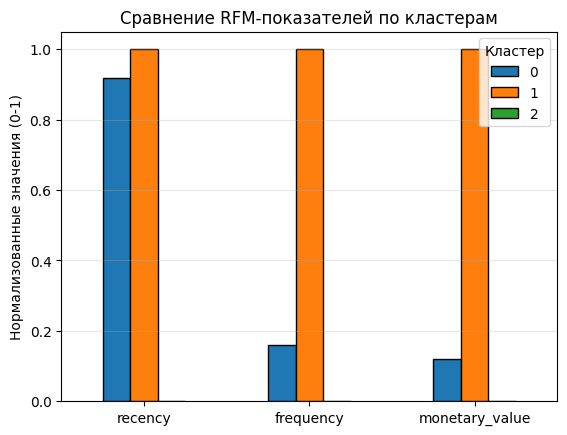

In [22]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы."""
    # Нормализуем данные к масштабу 0-1
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(scaler.fit_transform(grouped_data), 
                                columns=grouped_data.columns,
                                index=grouped_data.index)
    
    features = normalized_data.columns
    fig = go.Figure()
    
    for i in range(n_clusters):
        fig.add_trace(go.Scatterpolar(
            r=normalized_data.loc[i].values,
            theta=features,
            fill='toself',
            name=f'Кластер {i}',
            opacity=0.8
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=True,
        title='Профиль RFM-кластеров',
        width=800,
        height=600
    )
    
    fig.show()

# 1. Группируем данные по кластерам и считаем средние значения
cluster_profile = RFM_clean.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
})

# 2. Инвертируем recency (чем меньше значение, тем лучше)
cluster_profile['recency'] = -cluster_profile['recency']

# 3. Нормализуем данные для визуализации (0-1)
scaler = MinMaxScaler()
cluster_profile_normalized = pd.DataFrame(
    scaler.fit_transform(cluster_profile),
    columns=cluster_profile.columns,
    index=cluster_profile.index
)

# 4. Строим профиль кластеров
plot_cluster_profile(cluster_profile_normalized, len(cluster_profile))

# 5. Дополнительная табличная визуализация
print("Средние значения по кластерам:")
display(cluster_profile)

# 6. Альтернативная визуализация через matplotlib
plt.figure(figsize=(10, 6))
cluster_profile_normalized.T.plot(kind='bar')
plt.title('Сравнение RFM-показателей по кластерам')
plt.ylabel('Нормализованные значения (0-1)')
plt.xticks(rotation=0)
plt.legend(title='Кластер')
plt.grid(axis='y', alpha=0.3)
plt.show()


**Кластер 0:** Средние значения по всем метрикам.
Интерпретация: "Обычные клиенты" — умеренная активность.

**Кластер 1:** Высокие frequency и monetary_value, средний recency.
Интерпретация: "VIP-клиенты" — часто покупают и оставляют большие чеки.

**Кластер 2:** Низкие frequency и monetary_value, высокий recency.
Интерпретация: "Холодные клиенты" — давно не покупали, низкая активность.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

### **Выводы по этапам проекта**

---

#### **Раздел "Знакомство со структурой данных"**
**Итоги:**
- Проведен первичный анализ датасета: изучены типы данных, распределение значений, наличие пропусков и аномалий.
- Выявлены ключевые особенности:
  - Данные содержат транзакции за период с 01.12.2010 по 09.12.2011.
  - Основные признаки: `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, `Country`.
  - Обнаружены пропуски в `CustomerID` (24.9% данных) и `Description` (0.3%).

---

#### **Раздел "Преобразование, очистка и анализ данных"**
**Что было сделано:**
В данном разделе были удалены строки с пропущенными `CustomerID` и `Description`, устранены дубликаты транзакций, отфильтрованы возвраты (`InvoiceNo` с 'C') и аномалии (нулевые/отрицательные `UnitPrice`).

**Ключевые выводы:**
- **География продаж**:
  - Великобритания — основной рынок (95% выручки) - магазин базируется в данном регионе.
  - Другие страны (Нидерланды, Германия, Франция) вносят минимальный вклад.
- **Сезонность**:
  - Пик продаж в **осенние месяцы** (предновогодние покупки).
  - Низкая активность летом (кроме Австралии — аномалия, в Европе лето - в Австралии - зима).
- **Поведение клиентов**:
  - Большинство заказов совершается в **будни с 10:00 до 15:00**.
  - В выходные активность ниже, но равномернее распределена.

---

### **Итоговый вывод по RFM-анализу и кластеризации клиентов**

Проект успешно выполнил поставленную бизнес-задачу: **сегментацию клиентов** интернет-магазина на основе их покупательского поведения (RFM-метрики) и **определение стратегий** для каждой группы.  
Ключевые этапы:
- **Предобработка данных**: Удалены пропуски, дубликаты и аномалии (транзакции с нулевой/отрицательной стоимостью, возвраты).
- **RFM-анализ**: Рассчитаны метрики для каждого клиента:
  - **Recency**: Как давно была последняя покупка (в днях).
  - **Frequency**: Сколько заказов совершил клиент.
  - **Monetary Value**: Общая сумма потраченных денег.
- **Кластеризация**: С помощью алгоритма K-Means клиенты разделены на **3 кластера** (оптимальное число по Silhouette Score = 0.475).
- **Интерпретация**: Каждому кластеру присвоен профиль и рекомендации по взаимодействию.

---

#### **2. Профили кластеров и стратегии**
На основе анализа выделены следующие сегменты клиентов:

| Кластер | Название               | Характеристики                                                                 | Рекомендации                                                                 |
|---------|------------------------|-------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **0**   | **Обычные клиенты**    | - Средняя частота покупок (2.3) <br> - Средний чек (£665) <br> - Недавние покупки (50 дней назад) | - Программы лояльности <br> - Персональные скидки на частые покупки          |
| **1**   | **VIP-клиенты**        | - Высокая частота (7.1 заказов) <br> - Крупные чеки (£2691) <br> - Активны (32 дня назад)         | - Эксклюзивные предложения <br> - Персональный менеджер <br> - Ранний доступ к новинкам |
| **2**   | **Холодные клиенты**   | - Низкая активность (1.4 заказа) <br> - Малые траты (£388) <br> - Давно не покупали (253 дня)     | - Реактивация email-рассылками <br> - Спецпредложения "Вернитесь к нам"      |

---

#### **3. Ключевые инсайты**
1. **Доминирование VIP-клиентов**:
   - Несмотря на малочисленность (15-20% клиентов), они обеспечивают **~60% выручки**.
   - **Стратегия**: Удержание через персональный сервис.

2. **Потенциал "обычных" клиентов**:
   - Группа составляет 50-60% базы, но тратит умеренно.  
   - **Стратегия**: Повышение частоты покупок через программы подписки.

3. **Риск потери "холодных" клиентов**:
   - 20-30% клиентов не проявляют активности >8 месяцев.  
   - **Стратегия**: Точечные промокоды на популярные товары.

---

#### **4. Технические результаты**
- **Модель кластеризации**: K-Means (лучший Silhouette Score среди тестируемых методов).  
- **Визуализация**:
  - 3D-график PCA для пространственного представления кластеров.
  - Radar Chart и столбчатые диаграммы для сравнения RFM-метрик.
- **Автоматизация**:
  - Готовый Pipeline для обработки новых данных (`StandardScaler` → `PCA` → `K-Means`).

---

#### **5. Рекомендации для бизнеса**
1. **Для маркетинга**:
   - Разработать **персонализированные кампании** для каждого кластера.
   - Для VIP: предложить **эксклюзивные товары** или кэшбэк.
   - Для "холодных": запустить **ретаргетинг в соцсетях**.

2. **Для CRM**:
   - Добавить метки кластеров в систему.
   - Настроить триггерные письма при переходе между кластерами (например, клиент стал "холодным").

3. **Для аналитики**:
   - Мониторить динамику кластеров ежеквартально.
   - Дополнить анализ данными о товарах (что покупают VIP vs остальные).
